<h1 style="text-align:left;">Dimensionality Reduction: PCA</h1>

<br>
Muchos problemas de Machine Learning se desarrollar con miles o millones de variables (features) en cada muestra de entrenamiento. Esto no sólo puede afectar en factor tiempo, haciéndolo muy lento, <strong>sino que también puede hacer mucho más difícil encontrar una solución.</strong> Es por ello que trabajamos con reducción de la dimensionalidad para poder preprocesar los datos y dejarlos listos antes de trabajar con los diferentes modelos de Machine Learning.

<strong>PCA (Principal Component Analysis)</strong> es uno de los algoritmos de reducción de dimensionalidad más populares. Y es con el que trabajaremos durante este notebook.


###### Caso de uso
Como sabemos, siempre se aprende mejor con práctica y ejemplos, por ello se trabajará en un caso de uso inventado con datos reales para comprender los aspectos importantes del PCA.

Este notebook trata de analizar mediante métodos de Machine Learning al jugador más parecido a Mike James, el MVP actual de la Turkish Airlines Euroleague, en el cual somos un GM de cualquier equipo que busca al nuevo MVP de la competición.

En ese contexto fichar a Mike James es muy dificil, puesto que es uno de los jugadores mejor pagados de Europa. 

<strong>
Por lo tanto:
    
 - Para solucionar el problema del precio lo que buscamos es encontrar similitudes y correlaciones entre diferentes jugadores.
 
Y con esto, podemos tener una lista final con los jugadores más parecidos a él.
</strong>

¿Cómo hacemos esto?
Como hay muchas métricas diferentes para cada jugador, lo que debemos hacer es <strong>trabajar con 'Dimensionality Reduction'</strong>, en nuestro caso PCA, para comprimir los datasets y empezar a trabajar con las correlaciones. Así evitamos introducir ruido y problemas en nuestro sistema.

En este notebook explicaremos paso a paso cómo se desarrolla el proceso de similitud entre jugadores. Y luego no es más que juntar todos los resultados y ordenar por los coeficientes de correlación.

In [94]:
# Cargamos las librerías

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
from IPython.display import FileLink
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [95]:
# Cargamos el dataset
dt = pd.read_csv('data/Player Stats RS.csv', sep=';')

Vemos los datos para hacernos una idea de cómo son.

In [96]:
dt.head()

,RNK,NAME,ROLE,NAT,HEIGHT,AGE,TM NAME,GP,W,L,W%,MIN,PTS,2PTM,2PTA,2PT%,3PTM,3PTA,3PT%,FGM,FGA,FG%,FTM,FTA,FT%,OR,DR,TR,AST,TO,ST,BLK,BLKA,PF,DF,VAL,+ / -,POSS,USG%,PPP,OFF RTG (ON),DEF RTG (ON),NET RTG (ON),IND OFF RTG,IND DEF RTG,IND NET RTG,eFG%,TS%,RIM FREQ,RIM PPS,PAINT FREQ,PAINT PPS,MID FREQ,MID PPS,C3 FREQ,C3 PPS,L3 FREQ,L3 PPS,FT Ratio,TO%,AST%,AST% (2P),AST% (3P),AST% (FT),AST Ratio,AST/TO,OR%,OR% (after 2P),OR% (after 3P),OR% (after FT),DR%,DR% (after 2P),DR% (after 3P),DR% (after FT),TR%,ST%,BLK%,PF 100 Poss,DF 100 Poss,PER,OFF WIN SHARE,DEF WIN SHARE,WIN SHARE,WIN Share per 40,OBPM,DBPM,BPM,VORP,TM PACE (ON),TM OFF RTG (ON),TM DEF RTG (ON),TM NET RTG (ON),TM TS% (ON),TM OR% (ON),TM TO% (ON),TM FT Ratio (ON),OPP TS% (ON),OPP OR% (ON),OPP TO% (ON),OPP FT Ratio (ON),TM PACE (OFF),TM OFF RTG (OFF),TM DEF RTG (OFF),TM NET RTG (OFF),TM TS% (OFF),TM OR% (OFF),TM TO% (OFF),TM FT Ratio (OFF),OPP TS% (OFF),OPP OR% (OFF),OPP TO% (OFF),OPP FT Ratio (OFF),TM PACE (NET),TM OFF RTG (NET),TM DEF RTG (NET),TM NET RTG (NET),TM TS% (NET),TM OR% (NET),TM TO% (NET),TM FT Ratio (NET),OPP TS% (NET),OPP OR% (NET),OPP TO% (NET),OPP FT Ratio (NET)
0,1,Justin Bean,F/PF,USA,201,28,ALBA Berlin,27,5,22,19%,"15,5","3,9","1,0","2,2",47%,"0,5","1,3",36%,"1,5","3,5",43%,"0,4","0,5",71%,"0,9","2,1","3,0","0,7","0,5","0,7","0,4","0,1","1,2","1,1","6,0","-4,1","4,2",13%,"0,92","103,1","117,6","-14,5","102,6","105,1","-2,5",50%,52%,15%,"1,41",25%,"0,64",12%,"1,00",11%,"1,15",20%,"1,04",5%,11%,6%,5%,15%,2%,15%,"1,5","6,8%","6,7%","6,2%","0,0%","16,5%","13,9%","17,6%","10,8%","11,4%","2,6%","1,7%","4,2","3,9","15,2","-0,1","0,8","0,7","0,067","-2,9","1,7","-1,2","0,2","73,7","103,1","117,6","-14,5",55%,30%,17%,8%,62%,35%,17%,9%,"73,3","103,5","116,7","-13,3",56%,31%,19%,8%,60%,34%,16%,8%,"0,4","-0,3","0,8","-1,2",-1%,-1%,-2%,1%,1%,1%,2%,0%
1,2,Sterling Brown,SG,USA,198,29,ALBA Berlin,29,4,25,14%,"24,1","11,2","2,0","4,4",46%,"1,9","5,4",36%,"4,0","9,9",40%,"1,4","1,5",93%,"0,7","2,6","3,3","2,4","1,9","0,8","0,2","0,6","2,1","1,4","8,7","-6,0","12,4",25%,"0,91","104,4","119,6","-15,2","103,1","109,6","-6,5",50%,54%,13%,"1,25",17%,"0,81",5%,"0,42",6%,"1,57",38%,"1,00",5%,16%,15%,16%,19%,10%,16%,"1,3","3,5%","3,8%","2,3%","0,0%","12,3%","11,4%","10,7%","10,9%","7,9%","1,7%","0,4%","4,8","3,3","15,5","-0,1","0,9","0,8","0,046","-1,1","-1,9","-3,0","-0,4","73,2","104,4","119,6","-15,2",56%,30%,18%,9%,60%,33%,13%,8%,"71,9","105,0","116,0","-11,0",55%,30%,17%,7%,61%,35%,17%,9%,"1,3","-0,6","3,6","-4,2",1%,-1%,1%,2%,-1%,-2%,-4%,0%
2,3,Malte Delow,SG,GER,194,23,ALBA Berlin,34,5,29,15%,"17,0","5,1","1,0","2,1",49%,"0,9","2,7",32%,"1,9","4,8",39%,"0,5","0,7",78%,"0,8","1,4","2,3","2,3","1,7","0,8","0,1","0,2","2,2","1,2","4,6","-1,9","6,8",19%,"0,75","108,5","114,5","-6,0","100,1","106,7","-6,6",48%,50%,8%,"1,79",19%,"0,62",3%,"1,00",1%,"0,00",39%,"0,98",4%,26%,18%,17%,30%,6%,25%,"1,3","5,6%","6,8%","3,6%","4,0%","10,9%","10,8%","9,9%","2,1%","8,1%","2,4%","0,3%","7,1","3,9","9,9","-0,2","0,9","0,7","0,048","-3,2","-0,7","-3,9","-0,7","73,9","108,5","114,5","-6,0",57%,35%,19%,8%,61%,31%,18%,9%,"72,3","101,3","121,5","-20,2",54%,28%,17%,7%,61%,35%,14%,8%,"1,6","7,1","-7,0","14,2",3%,7%,1%,1%,0%,-4%,3%,2%
3,4,Martin Hermannsson,PG/SG,ICE,190,30,ALBA Berlin,12,1,11,8%,"20,4","7,2","1,9","4,3",44%,"0,7","2,0",33%,"2,6","6,3",41%,"1,3","1,3",100%,"0,1","1,4","1,5","4,2","2,3","0,8","0,2","0,7","1,6","1,9","7,3","-8,3","9,2",22%,"0,78","106,4","126,8","-20,4","113,4","116,6","-3,2",46%,52%,7%,"1,00",24%,"0,77",16%,"1,00",1%,"0,00",20%,"1,09",5%,25%,30%,26%,51%,4%,31%,"1,8","0,5%","0,0%","1,0%","0,0%","8,3%","7,0%","8,4%","10,0%","4,3%","2,0%","0,5%","4,2","5,2","12,6","0,2","0,2","0,4","0,063","-3,2","-3,8","-7,0","-0,7","71,9","106,4","126,8","-20,4",56%,29%,17%,6%,63%,33%,12%,8%,"75,3","100,9","118,4","-17,5",55%,29%,19%,7%,63%,30%,16%,8%,"-3,4","5,5","8,4","-2,9",1%,0%,-2%,-1%,0%,3%,-4%,0%
4,5,Christ Koumadje,C,CHA,223,28,ALBA Berlin,28,5,23,18%,"16,6","5,6","2,3","3

In [97]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Columns: 124 entries, RNK to OPP FT Ratio (NET)
dtypes: int64(5), object(119)
memory usage: 296.6+ KB


Importante conocer las variables y el tipo de dato que tienen, así nos empezamos a orientar.

In [98]:
dt.head()

,RNK,NAME,ROLE,NAT,HEIGHT,AGE,TM NAME,GP,W,L,W%,MIN,PTS,2PTM,2PTA,2PT%,3PTM,3PTA,3PT%,FGM,FGA,FG%,FTM,FTA,FT%,OR,DR,TR,AST,TO,ST,BLK,BLKA,PF,DF,VAL,+ / -,POSS,USG%,PPP,OFF RTG (ON),DEF RTG (ON),NET RTG (ON),IND OFF RTG,IND DEF RTG,IND NET RTG,eFG%,TS%,RIM FREQ,RIM PPS,PAINT FREQ,PAINT PPS,MID FREQ,MID PPS,C3 FREQ,C3 PPS,L3 FREQ,L3 PPS,FT Ratio,TO%,AST%,AST% (2P),AST% (3P),AST% (FT),AST Ratio,AST/TO,OR%,OR% (after 2P),OR% (after 3P),OR% (after FT),DR%,DR% (after 2P),DR% (after 3P),DR% (after FT),TR%,ST%,BLK%,PF 100 Poss,DF 100 Poss,PER,OFF WIN SHARE,DEF WIN SHARE,WIN SHARE,WIN Share per 40,OBPM,DBPM,BPM,VORP,TM PACE (ON),TM OFF RTG (ON),TM DEF RTG (ON),TM NET RTG (ON),TM TS% (ON),TM OR% (ON),TM TO% (ON),TM FT Ratio (ON),OPP TS% (ON),OPP OR% (ON),OPP TO% (ON),OPP FT Ratio (ON),TM PACE (OFF),TM OFF RTG (OFF),TM DEF RTG (OFF),TM NET RTG (OFF),TM TS% (OFF),TM OR% (OFF),TM TO% (OFF),TM FT Ratio (OFF),OPP TS% (OFF),OPP OR% (OFF),OPP TO% (OFF),OPP FT Ratio (OFF),TM PACE (NET),TM OFF RTG (NET),TM DEF RTG (NET),TM NET RTG (NET),TM TS% (NET),TM OR% (NET),TM TO% (NET),TM FT Ratio (NET),OPP TS% (NET),OPP OR% (NET),OPP TO% (NET),OPP FT Ratio (NET)
0,1,Justin Bean,F/PF,USA,201,28,ALBA Berlin,27,5,22,19%,"15,5","3,9","1,0","2,2",47%,"0,5","1,3",36%,"1,5","3,5",43%,"0,4","0,5",71%,"0,9","2,1","3,0","0,7","0,5","0,7","0,4","0,1","1,2","1,1","6,0","-4,1","4,2",13%,"0,92","103,1","117,6","-14,5","102,6","105,1","-2,5",50%,52%,15%,"1,41",25%,"0,64",12%,"1,00",11%,"1,15",20%,"1,04",5%,11%,6%,5%,15%,2%,15%,"1,5","6,8%","6,7%","6,2%","0,0%","16,5%","13,9%","17,6%","10,8%","11,4%","2,6%","1,7%","4,2","3,9","15,2","-0,1","0,8","0,7","0,067","-2,9","1,7","-1,2","0,2","73,7","103,1","117,6","-14,5",55%,30%,17%,8%,62%,35%,17%,9%,"73,3","103,5","116,7","-13,3",56%,31%,19%,8%,60%,34%,16%,8%,"0,4","-0,3","0,8","-1,2",-1%,-1%,-2%,1%,1%,1%,2%,0%
1,2,Sterling Brown,SG,USA,198,29,ALBA Berlin,29,4,25,14%,"24,1","11,2","2,0","4,4",46%,"1,9","5,4",36%,"4,0","9,9",40%,"1,4","1,5",93%,"0,7","2,6","3,3","2,4","1,9","0,8","0,2","0,6","2,1","1,4","8,7","-6,0","12,4",25%,"0,91","104,4","119,6","-15,2","103,1","109,6","-6,5",50%,54%,13%,"1,25",17%,"0,81",5%,"0,42",6%,"1,57",38%,"1,00",5%,16%,15%,16%,19%,10%,16%,"1,3","3,5%","3,8%","2,3%","0,0%","12,3%","11,4%","10,7%","10,9%","7,9%","1,7%","0,4%","4,8","3,3","15,5","-0,1","0,9","0,8","0,046","-1,1","-1,9","-3,0","-0,4","73,2","104,4","119,6","-15,2",56%,30%,18%,9%,60%,33%,13%,8%,"71,9","105,0","116,0","-11,0",55%,30%,17%,7%,61%,35%,17%,9%,"1,3","-0,6","3,6","-4,2",1%,-1%,1%,2%,-1%,-2%,-4%,0%
2,3,Malte Delow,SG,GER,194,23,ALBA Berlin,34,5,29,15%,"17,0","5,1","1,0","2,1",49%,"0,9","2,7",32%,"1,9","4,8",39%,"0,5","0,7",78%,"0,8","1,4","2,3","2,3","1,7","0,8","0,1","0,2","2,2","1,2","4,6","-1,9","6,8",19%,"0,75","108,5","114,5","-6,0","100,1","106,7","-6,6",48%,50%,8%,"1,79",19%,"0,62",3%,"1,00",1%,"0,00",39%,"0,98",4%,26%,18%,17%,30%,6%,25%,"1,3","5,6%","6,8%","3,6%","4,0%","10,9%","10,8%","9,9%","2,1%","8,1%","2,4%","0,3%","7,1","3,9","9,9","-0,2","0,9","0,7","0,048","-3,2","-0,7","-3,9","-0,7","73,9","108,5","114,5","-6,0",57%,35%,19%,8%,61%,31%,18%,9%,"72,3","101,3","121,5","-20,2",54%,28%,17%,7%,61%,35%,14%,8%,"1,6","7,1","-7,0","14,2",3%,7%,1%,1%,0%,-4%,3%,2%
3,4,Martin Hermannsson,PG/SG,ICE,190,30,ALBA Berlin,12,1,11,8%,"20,4","7,2","1,9","4,3",44%,"0,7","2,0",33%,"2,6","6,3",41%,"1,3","1,3",100%,"0,1","1,4","1,5","4,2","2,3","0,8","0,2","0,7","1,6","1,9","7,3","-8,3","9,2",22%,"0,78","106,4","126,8","-20,4","113,4","116,6","-3,2",46%,52%,7%,"1,00",24%,"0,77",16%,"1,00",1%,"0,00",20%,"1,09",5%,25%,30%,26%,51%,4%,31%,"1,8","0,5%","0,0%","1,0%","0,0%","8,3%","7,0%","8,4%","10,0%","4,3%","2,0%","0,5%","4,2","5,2","12,6","0,2","0,2","0,4","0,063","-3,2","-3,8","-7,0","-0,7","71,9","106,4","126,8","-20,4",56%,29%,17%,6%,63%,33%,12%,8%,"75,3","100,9","118,4","-17,5",55%,29%,19%,7%,63%,30%,16%,8%,"-3,4","5,5","8,4","-2,9",1%,0%,-2%,-1%,0%,3%,-4%,0%
4,5,Christ Koumadje,C,CHA,223,28,ALBA Berlin,28,5,23,18%,"16,6","5,6","2,3","3

###### Limpieza del dataset
Como sabemos, debemos de limpiar los datos antes de poder tratarlos.

In [99]:
# Reemplazar "DNP" y "-" por 0
dt = dt.replace({'DNP': 0, '-': 0})

Descargamos el archivo en formato Excel para cargarlo en la plataforma PowerBI

In [100]:
# Guardar el DataFrame modificado en un nuevo archivo Excel
output_path = 'output_players_stats_powerbi.xlsx'
dt.to_excel(output_path, index=False)

# Crear un enlace de descarga para el archivo
display(FileLink(output_path))

C:\Users\mendi\output_players_stats_powerbi.xlsx

In [101]:
dt.head()

,RNK,NAME,ROLE,NAT,HEIGHT,AGE,TM NAME,GP,W,L,W%,MIN,PTS,2PTM,2PTA,2PT%,3PTM,3PTA,3PT%,FGM,FGA,FG%,FTM,FTA,FT%,OR,DR,TR,AST,TO,ST,BLK,BLKA,PF,DF,VAL,+ / -,POSS,USG%,PPP,OFF RTG (ON),DEF RTG (ON),NET RTG (ON),IND OFF RTG,IND DEF RTG,IND NET RTG,eFG%,TS%,RIM FREQ,RIM PPS,PAINT FREQ,PAINT PPS,MID FREQ,MID PPS,C3 FREQ,C3 PPS,L3 FREQ,L3 PPS,FT Ratio,TO%,AST%,AST% (2P),AST% (3P),AST% (FT),AST Ratio,AST/TO,OR%,OR% (after 2P),OR% (after 3P),OR% (after FT),DR%,DR% (after 2P),DR% (after 3P),DR% (after FT),TR%,ST%,BLK%,PF 100 Poss,DF 100 Poss,PER,OFF WIN SHARE,DEF WIN SHARE,WIN SHARE,WIN Share per 40,OBPM,DBPM,BPM,VORP,TM PACE (ON),TM OFF RTG (ON),TM DEF RTG (ON),TM NET RTG (ON),TM TS% (ON),TM OR% (ON),TM TO% (ON),TM FT Ratio (ON),OPP TS% (ON),OPP OR% (ON),OPP TO% (ON),OPP FT Ratio (ON),TM PACE (OFF),TM OFF RTG (OFF),TM DEF RTG (OFF),TM NET RTG (OFF),TM TS% (OFF),TM OR% (OFF),TM TO% (OFF),TM FT Ratio (OFF),OPP TS% (OFF),OPP OR% (OFF),OPP TO% (OFF),OPP FT Ratio (OFF),TM PACE (NET),TM OFF RTG (NET),TM DEF RTG (NET),TM NET RTG (NET),TM TS% (NET),TM OR% (NET),TM TO% (NET),TM FT Ratio (NET),OPP TS% (NET),OPP OR% (NET),OPP TO% (NET),OPP FT Ratio (NET)
0,1,Justin Bean,F/PF,USA,201,28,ALBA Berlin,27,5,22,19%,"15,5","3,9","1,0","2,2",47%,"0,5","1,3",36%,"1,5","3,5",43%,"0,4","0,5",71%,"0,9","2,1","3,0","0,7","0,5","0,7","0,4","0,1","1,2","1,1","6,0","-4,1","4,2",13%,"0,92","103,1","117,6","-14,5","102,6","105,1","-2,5",50%,52%,15%,"1,41",25%,"0,64",12%,"1,00",11%,"1,15",20%,"1,04",5%,11%,6%,5%,15%,2%,15%,"1,5","6,8%","6,7%","6,2%","0,0%","16,5%","13,9%","17,6%","10,8%","11,4%","2,6%","1,7%","4,2","3,9","15,2","-0,1","0,8","0,7","0,067","-2,9","1,7","-1,2","0,2","73,7","103,1","117,6","-14,5",55%,30%,17%,8%,62%,35%,17%,9%,"73,3","103,5","116,7","-13,3",56%,31%,19%,8%,60%,34%,16%,8%,"0,4","-0,3","0,8","-1,2",-1%,-1%,-2%,1%,1%,1%,2%,0%
1,2,Sterling Brown,SG,USA,198,29,ALBA Berlin,29,4,25,14%,"24,1","11,2","2,0","4,4",46%,"1,9","5,4",36%,"4,0","9,9",40%,"1,4","1,5",93%,"0,7","2,6","3,3","2,4","1,9","0,8","0,2","0,6","2,1","1,4","8,7","-6,0","12,4",25%,"0,91","104,4","119,6","-15,2","103,1","109,6","-6,5",50%,54%,13%,"1,25",17%,"0,81",5%,"0,42",6%,"1,57",38%,"1,00",5%,16%,15%,16%,19%,10%,16%,"1,3","3,5%","3,8%","2,3%","0,0%","12,3%","11,4%","10,7%","10,9%","7,9%","1,7%","0,4%","4,8","3,3","15,5","-0,1","0,9","0,8","0,046","-1,1","-1,9","-3,0","-0,4","73,2","104,4","119,6","-15,2",56%,30%,18%,9%,60%,33%,13%,8%,"71,9","105,0","116,0","-11,0",55%,30%,17%,7%,61%,35%,17%,9%,"1,3","-0,6","3,6","-4,2",1%,-1%,1%,2%,-1%,-2%,-4%,0%
2,3,Malte Delow,SG,GER,194,23,ALBA Berlin,34,5,29,15%,"17,0","5,1","1,0","2,1",49%,"0,9","2,7",32%,"1,9","4,8",39%,"0,5","0,7",78%,"0,8","1,4","2,3","2,3","1,7","0,8","0,1","0,2","2,2","1,2","4,6","-1,9","6,8",19%,"0,75","108,5","114,5","-6,0","100,1","106,7","-6,6",48%,50%,8%,"1,79",19%,"0,62",3%,"1,00",1%,"0,00",39%,"0,98",4%,26%,18%,17%,30%,6%,25%,"1,3","5,6%","6,8%","3,6%","4,0%","10,9%","10,8%","9,9%","2,1%","8,1%","2,4%","0,3%","7,1","3,9","9,9","-0,2","0,9","0,7","0,048","-3,2","-0,7","-3,9","-0,7","73,9","108,5","114,5","-6,0",57%,35%,19%,8%,61%,31%,18%,9%,"72,3","101,3","121,5","-20,2",54%,28%,17%,7%,61%,35%,14%,8%,"1,6","7,1","-7,0","14,2",3%,7%,1%,1%,0%,-4%,3%,2%
3,4,Martin Hermannsson,PG/SG,ICE,190,30,ALBA Berlin,12,1,11,8%,"20,4","7,2","1,9","4,3",44%,"0,7","2,0",33%,"2,6","6,3",41%,"1,3","1,3",100%,"0,1","1,4","1,5","4,2","2,3","0,8","0,2","0,7","1,6","1,9","7,3","-8,3","9,2",22%,"0,78","106,4","126,8","-20,4","113,4","116,6","-3,2",46%,52%,7%,"1,00",24%,"0,77",16%,"1,00",1%,"0,00",20%,"1,09",5%,25%,30%,26%,51%,4%,31%,"1,8","0,5%","0,0%","1,0%","0,0%","8,3%","7,0%","8,4%","10,0%","4,3%","2,0%","0,5%","4,2","5,2","12,6","0,2","0,2","0,4","0,063","-3,2","-3,8","-7,0","-0,7","71,9","106,4","126,8","-20,4",56%,29%,17%,6%,63%,33%,12%,8%,"75,3","100,9","118,4","-17,5",55%,29%,19%,7%,63%,30%,16%,8%,"-3,4","5,5","8,4","-2,9",1%,0%,-2%,-1%,0%,3%,-4%,0%
4,5,Christ Koumadje,C,CHA,223,28,ALBA Berlin,28,5,23,18%,"16,6","5,6","2,3","3

In [102]:
# Función para eliminar el % y convertir a decimal
def convert_percentage(column):
     # Reemplaza comas por puntos
    column = column.str.replace(',', '.')
    # Elimina el símbolo % y convierte a decimal
    return pd.to_numeric(column.str.replace('%', ''), errors='coerce') / 100
# Aplica la conversión a las columnas que contienen porcentajes
for column in dt.columns:
    if dt[column].dtype == object and dt[column].str.contains('%').any():
        dt[column] = convert_percentage(dt[column])

In [103]:
dt.head()

,RNK,NAME,ROLE,NAT,HEIGHT,AGE,TM NAME,GP,W,L,W%,MIN,PTS,2PTM,2PTA,2PT%,3PTM,3PTA,3PT%,FGM,FGA,FG%,FTM,FTA,FT%,OR,DR,TR,AST,TO,ST,BLK,BLKA,PF,DF,VAL,+ / -,POSS,USG%,PPP,OFF RTG (ON),DEF RTG (ON),NET RTG (ON),IND OFF RTG,IND DEF RTG,IND NET RTG,eFG%,TS%,RIM FREQ,RIM PPS,PAINT FREQ,PAINT PPS,MID FREQ,MID PPS,C3 FREQ,C3 PPS,L3 FREQ,L3 PPS,FT Ratio,TO%,AST%,AST% (2P),AST% (3P),AST% (FT),AST Ratio,AST/TO,OR%,OR% (after 2P),OR% (after 3P),OR% (after FT),DR%,DR% (after 2P),DR% (after 3P),DR% (after FT),TR%,ST%,BLK%,PF 100 Poss,DF 100 Poss,PER,OFF WIN SHARE,DEF WIN SHARE,WIN SHARE,WIN Share per 40,OBPM,DBPM,BPM,VORP,TM PACE (ON),TM OFF RTG (ON),TM DEF RTG (ON),TM NET RTG (ON),TM TS% (ON),TM OR% (ON),TM TO% (ON),TM FT Ratio (ON),OPP TS% (ON),OPP OR% (ON),OPP TO% (ON),OPP FT Ratio (ON),TM PACE (OFF),TM OFF RTG (OFF),TM DEF RTG (OFF),TM NET RTG (OFF),TM TS% (OFF),TM OR% (OFF),TM TO% (OFF),TM FT Ratio (OFF),OPP TS% (OFF),OPP OR% (OFF),OPP TO% (OFF),OPP FT Ratio (OFF),TM PACE (NET),TM OFF RTG (NET),TM DEF RTG (NET),TM NET RTG (NET),TM TS% (NET),TM OR% (NET),TM TO% (NET),TM FT Ratio (NET),OPP TS% (NET),OPP OR% (NET),OPP TO% (NET),OPP FT Ratio (NET)
0,1,Justin Bean,F/PF,USA,201,28,ALBA Berlin,27,5,22,0.19,"15,5","3,9","1,0","2,2",0.47,"0,5","1,3",0.36,"1,5","3,5",0.43,"0,4","0,5",0.71,"0,9","2,1","3,0","0,7","0,5","0,7","0,4","0,1","1,2","1,1","6,0","-4,1","4,2",0.13,"0,92","103,1","117,6","-14,5","102,6","105,1","-2,5",0.50,0.52,0.15,"1,41",0.25,"0,64",0.12,"1,00",0.11,"1,15",0.20,"1,04",0.05,0.11,0.06,0.05,0.15,0.02,0.15,"1,5",0.068,0.067,0.062,0.000,0.165,0.139,0.176,0.108,0.114,0.026,0.017,"4,2","3,9","15,2","-0,1","0,8","0,7","0,067","-2,9","1,7","-1,2","0,2","73,7","103,1","117,6","-14,5",0.55,0.30,0.17,0.08,0.62,0.35,0.17,0.09,"73,3","103,5","116,7","-13,3",0.56,0.31,0.19,0.08,0.60,0.34,0.16,0.08,"0,4","-0,3","0,8","-1,2",-0.01,-0.01,-0.02,0.01,0.01,0.01,0.02,0.00
1,2,Sterling Brown,SG,USA,198,29,ALBA Berlin,29,4,25,0.14,"24,1","11,2","2,0","4,4",0.46,"1,9","5,4",0.36,"4,0","9,9",0.40,"1,4","1,5",0.93,"0,7","2,6","3,3","2,4","1,9","0,8","0,2","0,6","2,1","1,4","8,7","-6,0","12,4",0.25,"0,91","104,4","119,6","-15,2","103,1","109,6","-6,5",0.50,0.54,0.13,"1,25",0.17,"0,81",0.05,"0,42",0.06,"1,57",0.38,"1,00",0.05,0.16,0.15,0.16,0.19,0.10,0.16,"1,3",0.035,0.038,0.023,0.000,0.123,0.114,0.107,0.109,0.079,0.017,0.004,"4,8","3,3","15,5","-0,1","0,9","0,8","0,046","-1,1","-1,9","-3,0","-0,4","73,2","104,4","119,6","-15,2",0.56,0.30,0.18,0.09,0.60,0.33,0.13,0.08,"71,9","105,0","116,0","-11,0",0.55,0.30,0.17,0.07,0.61,0.35,0.17,0.09,"1,3","-0,6","3,6","-4,2",0.01,-0.01,0.01,0.02,-0.01,-0.02,-0.04,0.00
2,3,Malte Delow,SG,GER,194,23,ALBA Berlin,34,5,29,0.15,"17,0","5,1","1,0","2,1",0.49,"0,9","2,7",0.32,"1,9","4,8",0.39,"0,5","0,7",0.78,"0,8","1,4","2,3","2,3","1,7","0,8","0,1","0,2","2,2","1,2","4,6","-1,9","6,8",0.19,"0,75","108,5","114,5","-6,0","100,1","106,7","-6,6",0.48,0.50,0.08,"1,79",0.19,"0,62",0.03,"1,00",0.01,"0,00",0.39,"0,98",0.04,0.26,0.18,0.17,0.30,0.06,0.25,"1,3",0.056,0.068,0.036,0.040,0.109,0.108,0.099,0.021,0.081,0.024,0.003,"7,1","3,9","9,9","-0,2","0,9","0,7","0,048","-3,2","-0,7","-3,9","-0,7","73,9","108,5","114,5","-6,0",0.57,0.35,0.19,0.08,0.61,0.31,0.18,0.09,"72,3","101,3","121,5","-20,2",0.54,0.28,0.17,0.07,0.61,0.35,0.14,0.08,"1,6","7,1","-7,0","14,2",0.03,0.07,0.01,0.01,0.00,-0.04,0.03,0.02
3,4,Martin Hermannsson,PG/SG,ICE,190,30,ALBA Berlin,12,1,11,0.08,"20,4","7,2","1,9","4,3",0.44,"0,7","2,0",0.33,"2,6","6,3",0.41,"1,3","1,3",1.00,"0,1","1,4","1,5","4,2","2,3","0,8","0,2","0,7","1,6","1,9","7,3","-8,3","9,2",0.22,"0,78","106,4","126,8","-20,4","113,4","116,6","-3,2",0.46,0.52,0.07,"1,00",0.24,"0,77",0.16,"1,00",0.01,"0,00",0.20,"1,09",0.05,0.25,0.30,0.26,0.51,0.04,0.31,"1,8",0.005,0.000,0.010,0.000,0.083,0.070,0.084,0.100,0.043,0.020,0.005,"4,2","5,2","12,6","0,2","0,2","0,4","0,063","-3,2","-3,8","-7,0","-0,7","71,9","106,4","126,8","-20,4",0.56,0.29,0.17,0.06,0.63,0.33,0.12,0.08,"75,3","100,9","118,4","-17,5",0.5

In [104]:
# Reemplaza las comas por puntos y convierte las columnas a tipo float
for column in dt.columns:
    # Verifica si la columna contiene números con comas
    if dt[column].dtype == object and dt[column].str.contains(',').any():
        # Reemplaza comas por puntos
        dt[column] = dt[column].str.replace(',', '.')
        # Convierte la columna al tipo numérico (float)
        dt[column] = dt[column].astype(float)

In [105]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Columns: 124 entries, RNK to OPP FT Ratio (NET)
dtypes: float64(114), int64(5), object(5)
memory usage: 296.6+ KB


In [106]:
dt.head(20)

,RNK,NAME,ROLE,NAT,HEIGHT,AGE,TM NAME,GP,W,L,W%,MIN,PTS,2PTM,2PTA,2PT%,3PTM,3PTA,3PT%,FGM,FGA,FG%,FTM,FTA,FT%,OR,DR,TR,AST,TO,ST,BLK,BLKA,PF,DF,VAL,+ / -,POSS,USG%,PPP,OFF RTG (ON),DEF RTG (ON),NET RTG (ON),IND OFF RTG,IND DEF RTG,IND NET RTG,eFG%,TS%,RIM FREQ,RIM PPS,PAINT FREQ,PAINT PPS,MID FREQ,MID PPS,C3 FREQ,C3 PPS,L3 FREQ,L3 PPS,FT Ratio,TO%,AST%,AST% (2P),AST% (3P),AST% (FT),AST Ratio,AST/TO,OR%,OR% (after 2P),OR% (after 3P),OR% (after FT),DR%,DR% (after 2P),DR% (after 3P),DR% (after FT),TR%,ST%,BLK%,PF 100 Poss,DF 100 Poss,PER,OFF WIN SHARE,DEF WIN SHARE,WIN SHARE,WIN Share per 40,OBPM,DBPM,BPM,VORP,TM PACE (ON),TM OFF RTG (ON),TM DEF RTG (ON),TM NET RTG (ON),TM TS% (ON),TM OR% (ON),TM TO% (ON),TM FT Ratio (ON),OPP TS% (ON),OPP OR% (ON),OPP TO% (ON),OPP FT Ratio (ON),TM PACE (OFF),TM OFF RTG (OFF),TM DEF RTG (OFF),TM NET RTG (OFF),TM TS% (OFF),TM OR% (OFF),TM TO% (OFF),TM FT Ratio (OFF),OPP TS% (OFF),OPP OR% (OFF),OPP TO% (OFF),OPP FT Ratio (OFF),TM PACE (NET),TM OFF RTG (NET),TM DEF RTG (NET),TM NET RTG (NET),TM TS% (NET),TM OR% (NET),TM TO% (NET),TM FT Ratio (NET),OPP TS% (NET),OPP OR% (NET),OPP TO% (NET),OPP FT Ratio (NET)
0,1,Justin Bean,F/PF,USA,201,28,ALBA Berlin,27,5,22,0.19,15.5,3.9,1.0,2.2,0.47,0.5,1.3,0.36,1.5,3.5,0.43,0.4,0.5,0.71,0.9,2.1,3.0,0.7,0.5,0.7,0.4,0.1,1.2,1.1,6.0,-4.1,4.2,0.13,0.92,103.1,117.6,-14.5,102.6,105.1,-2.5,0.50,0.52,0.15,1.41,0.25,0.64,0.12,1.00,0.11,1.15,0.20,1.04,0.05,0.11,0.06,0.05,0.15,0.02,0.15,1.5,0.068,0.067,0.062,0.000,0.165,0.139,0.176,0.108,0.114,0.026,0.017,4.2,3.9,15.2,-0.1,0.8,0.7,0.067,-2.9,1.7,-1.2,0.2,73.7,103.1,117.6,-14.5,0.55,0.30,0.17,0.08,0.62,0.35,0.17,0.09,73.3,103.5,116.7,-13.3,0.56,0.31,0.19,0.08,0.60,0.34,0.16,0.08,0.4,-0.3,0.8,-1.2,-0.01,-0.01,-0.02,0.01,0.01,0.01,0.02,0.00
1,2,Sterling Brown,SG,USA,198,29,ALBA Berlin,29,4,25,0.14,24.1,11.2,2.0,4.4,0.46,1.9,5.4,0.36,4.0,9.9,0.40,1.4,1.5,0.93,0.7,2.6,3.3,2.4,1.9,0.8,0.2,0.6,2.1,1.4,8.7,-6.0,12.4,0.25,0.91,104.4,119.6,-15.2,103.1,109.6,-6.5,0.50,0.54,0.13,1.25,0.17,0.81,0.05,0.42,0.06,1.57,0.38,1.00,0.05,0.16,0.15,0.16,0.19,0.10,0.16,1.3,0.035,0.038,0.023,0.000,0.123,0.114,0.107,0.109,0.079,0.017,0.004,4.8,3.3,15.5,-0.1,0.9,0.8,0.046,-1.1,-1.9,-3.0,-0.4,73.2,104.4,119.6,-15.2,0.56,0.30,0.18,0.09,0.60,0.33,0.13,0.08,71.9,105.0,116.0,-11.0,0.55,0.30,0.17,0.07,0.61,0.35,0.17,0.09,1.3,-0.6,3.6,-4.2,0.01,-0.01,0.01,0.02,-0.01,-0.02,-0.04,0.00
2,3,Malte Delow,SG,GER,194,23,ALBA Berlin,34,5,29,0.15,17.0,5.1,1.0,2.1,0.49,0.9,2.7,0.32,1.9,4.8,0.39,0.5,0.7,0.78,0.8,1.4,2.3,2.3,1.7,0.8,0.1,0.2,2.2,1.2,4.6,-1.9,6.8,0.19,0.75,108.5,114.5,-6.0,100.1,106.7,-6.6,0.48,0.50,0.08,1.79,0.19,0.62,0.03,1.00,0.01,0.00,0.39,0.98,0.04,0.26,0.18,0.17,0.30,0.06,0.25,1.3,0.056,0.068,0.036,0.040,0.109,0.108,0.099,0.021,0.081,0.024,0.003,7.1,3.9,9.9,-0.2,0.9,0.7,0.048,-3.2,-0.7,-3.9,-0.7,73.9,108.5,114.5,-6.0,0.57,0.35,0.19,0.08,0.61,0.31,0.18,0.09,72.3,101.3,121.5,-20.2,0.54,0.28,0.17,0.07,0.61,0.35,0.14,0.08,1.6,7.1,-7.0,14.2,0.03,0.07,0.01,0.01,0.00,-0.04,0.03,0.02
3,4,Martin Hermannsson,PG/SG,ICE,190,30,ALBA Berlin,12,1,11,0.08,20.4,7.2,1.9,4.3,0.44,0.7,2.0,0.33,2.6,6.3,0.41,1.3,1.3,1.00,0.1,1.4,1.5,4.2,2.3,0.8,0.2,0.7,1.6,1.9,7.3,-8.3,9.2,0.22,0.78,106.4,126.8,-20.4,113.4,116.6,-3.2,0.46,0.52,0.07,1.00,0.24,0.77,0.16,1.00,0.01,0.00,0.20,1.09,0.05,0.25,0.30,0.26,0.51,0.04,0.31,1.8,0.005,0.000,0.010,0.000,0.083,0.070,0.084,0.100,0.043,0.020,0.005,4.2,5.2,12.6,0.2,0.2,0.4,0.063,-3.2,-3.8,-7.0,-0.7,71.9,106.4,126.8,-20.4,0.56,0.29,0.17,0.06,0.63,0.33,0.12,0.08,75.3,100.9,118.4,-17.5,0.55,0.29,0.19,0.07,0.63,0.30,0.16,0.08,-3.4,5.5,8.4,-2.9,0.01,0.00,-0.02,-0.01,0.00,0.03,-0.04,0.00
4,5,Christ Koumadje,C,CHA,223,28,ALBA Berlin,28,5,23,0.18,16.6,5.6,2.3,3.7,0.62,0.0,0.0,NaN,2.3,3.7,0.62,1.1,1.6,0.68,2.1,3.3,5.4,0.3,0.9,0.4,0.9,0.3,2.1,1.6,8.9,-3.0,5.3,0.15,1.07,103.5,114.2,-10.7,112.6,101.3,11.3,0.62,0.64,0.41,1.53,0.27,0.85,0.02,0.67,0.00,NaN,0.00,NaN,0.14,0.17,0.02,0.01,0.05,0.02,0.05,0.3,0.141,0.128,0.137,0.048,0.221,0.215,0.183,0.158,0.181

In [107]:
# Función para convertir NaN en 0
def convert_nan_to_zero(dataframe):
    return dataframe.fillna(0)

# Aplica la función al DataFrame
dt = convert_nan_to_zero(dt)

In [108]:
dt.head()

,RNK,NAME,ROLE,NAT,HEIGHT,AGE,TM NAME,GP,W,L,W%,MIN,PTS,2PTM,2PTA,2PT%,3PTM,3PTA,3PT%,FGM,FGA,FG%,FTM,FTA,FT%,OR,DR,TR,AST,TO,ST,BLK,BLKA,PF,DF,VAL,+ / -,POSS,USG%,PPP,OFF RTG (ON),DEF RTG (ON),NET RTG (ON),IND OFF RTG,IND DEF RTG,IND NET RTG,eFG%,TS%,RIM FREQ,RIM PPS,PAINT FREQ,PAINT PPS,MID FREQ,MID PPS,C3 FREQ,C3 PPS,L3 FREQ,L3 PPS,FT Ratio,TO%,AST%,AST% (2P),AST% (3P),AST% (FT),AST Ratio,AST/TO,OR%,OR% (after 2P),OR% (after 3P),OR% (after FT),DR%,DR% (after 2P),DR% (after 3P),DR% (after FT),TR%,ST%,BLK%,PF 100 Poss,DF 100 Poss,PER,OFF WIN SHARE,DEF WIN SHARE,WIN SHARE,WIN Share per 40,OBPM,DBPM,BPM,VORP,TM PACE (ON),TM OFF RTG (ON),TM DEF RTG (ON),TM NET RTG (ON),TM TS% (ON),TM OR% (ON),TM TO% (ON),TM FT Ratio (ON),OPP TS% (ON),OPP OR% (ON),OPP TO% (ON),OPP FT Ratio (ON),TM PACE (OFF),TM OFF RTG (OFF),TM DEF RTG (OFF),TM NET RTG (OFF),TM TS% (OFF),TM OR% (OFF),TM TO% (OFF),TM FT Ratio (OFF),OPP TS% (OFF),OPP OR% (OFF),OPP TO% (OFF),OPP FT Ratio (OFF),TM PACE (NET),TM OFF RTG (NET),TM DEF RTG (NET),TM NET RTG (NET),TM TS% (NET),TM OR% (NET),TM TO% (NET),TM FT Ratio (NET),OPP TS% (NET),OPP OR% (NET),OPP TO% (NET),OPP FT Ratio (NET)
0,1,Justin Bean,F/PF,USA,201,28,ALBA Berlin,27,5,22,0.19,15.5,3.9,1.0,2.2,0.47,0.5,1.3,0.36,1.5,3.5,0.43,0.4,0.5,0.71,0.9,2.1,3.0,0.7,0.5,0.7,0.4,0.1,1.2,1.1,6.0,-4.1,4.2,0.13,0.92,103.1,117.6,-14.5,102.6,105.1,-2.5,0.50,0.52,0.15,1.41,0.25,0.64,0.12,1.00,0.11,1.15,0.20,1.04,0.05,0.11,0.06,0.05,0.15,0.02,0.15,1.5,0.068,0.067,0.062,0.000,0.165,0.139,0.176,0.108,0.114,0.026,0.017,4.2,3.9,15.2,-0.1,0.8,0.7,0.067,-2.9,1.7,-1.2,0.2,73.7,103.1,117.6,-14.5,0.55,0.30,0.17,0.08,0.62,0.35,0.17,0.09,73.3,103.5,116.7,-13.3,0.56,0.31,0.19,0.08,0.60,0.34,0.16,0.08,0.4,-0.3,0.8,-1.2,-0.01,-0.01,-0.02,0.01,0.01,0.01,0.02,0.00
1,2,Sterling Brown,SG,USA,198,29,ALBA Berlin,29,4,25,0.14,24.1,11.2,2.0,4.4,0.46,1.9,5.4,0.36,4.0,9.9,0.40,1.4,1.5,0.93,0.7,2.6,3.3,2.4,1.9,0.8,0.2,0.6,2.1,1.4,8.7,-6.0,12.4,0.25,0.91,104.4,119.6,-15.2,103.1,109.6,-6.5,0.50,0.54,0.13,1.25,0.17,0.81,0.05,0.42,0.06,1.57,0.38,1.00,0.05,0.16,0.15,0.16,0.19,0.10,0.16,1.3,0.035,0.038,0.023,0.000,0.123,0.114,0.107,0.109,0.079,0.017,0.004,4.8,3.3,15.5,-0.1,0.9,0.8,0.046,-1.1,-1.9,-3.0,-0.4,73.2,104.4,119.6,-15.2,0.56,0.30,0.18,0.09,0.60,0.33,0.13,0.08,71.9,105.0,116.0,-11.0,0.55,0.30,0.17,0.07,0.61,0.35,0.17,0.09,1.3,-0.6,3.6,-4.2,0.01,-0.01,0.01,0.02,-0.01,-0.02,-0.04,0.00
2,3,Malte Delow,SG,GER,194,23,ALBA Berlin,34,5,29,0.15,17.0,5.1,1.0,2.1,0.49,0.9,2.7,0.32,1.9,4.8,0.39,0.5,0.7,0.78,0.8,1.4,2.3,2.3,1.7,0.8,0.1,0.2,2.2,1.2,4.6,-1.9,6.8,0.19,0.75,108.5,114.5,-6.0,100.1,106.7,-6.6,0.48,0.50,0.08,1.79,0.19,0.62,0.03,1.00,0.01,0.00,0.39,0.98,0.04,0.26,0.18,0.17,0.30,0.06,0.25,1.3,0.056,0.068,0.036,0.040,0.109,0.108,0.099,0.021,0.081,0.024,0.003,7.1,3.9,9.9,-0.2,0.9,0.7,0.048,-3.2,-0.7,-3.9,-0.7,73.9,108.5,114.5,-6.0,0.57,0.35,0.19,0.08,0.61,0.31,0.18,0.09,72.3,101.3,121.5,-20.2,0.54,0.28,0.17,0.07,0.61,0.35,0.14,0.08,1.6,7.1,-7.0,14.2,0.03,0.07,0.01,0.01,0.00,-0.04,0.03,0.02
3,4,Martin Hermannsson,PG/SG,ICE,190,30,ALBA Berlin,12,1,11,0.08,20.4,7.2,1.9,4.3,0.44,0.7,2.0,0.33,2.6,6.3,0.41,1.3,1.3,1.00,0.1,1.4,1.5,4.2,2.3,0.8,0.2,0.7,1.6,1.9,7.3,-8.3,9.2,0.22,0.78,106.4,126.8,-20.4,113.4,116.6,-3.2,0.46,0.52,0.07,1.00,0.24,0.77,0.16,1.00,0.01,0.00,0.20,1.09,0.05,0.25,0.30,0.26,0.51,0.04,0.31,1.8,0.005,0.000,0.010,0.000,0.083,0.070,0.084,0.100,0.043,0.020,0.005,4.2,5.2,12.6,0.2,0.2,0.4,0.063,-3.2,-3.8,-7.0,-0.7,71.9,106.4,126.8,-20.4,0.56,0.29,0.17,0.06,0.63,0.33,0.12,0.08,75.3,100.9,118.4,-17.5,0.55,0.29,0.19,0.07,0.63,0.30,0.16,0.08,-3.4,5.5,8.4,-2.9,0.01,0.00,-0.02,-0.01,0.00,0.03,-0.04,0.00
4,5,Christ Koumadje,C,CHA,223,28,ALBA Berlin,28,5,23,0.18,16.6,5.6,2.3,3.7,0.62,0.0,0.0,0.00,2.3,3.7,0.62,1.1,1.6,0.68,2.1,3.3,5.4,0.3,0.9,0.4,0.9,0.3,2.1,1.6,8.9,-3.0,5.3,0.15,1.07,103.5,114.2,-10.7,112.6,101.3,11.3,0.62,0.64,0.41,1.53,0.27,0.85,0.02,0.67,0.00,0.00,0.00,0.00,0.14,0.17,0.02,0.01,0.05,0.02,0.05,0.3,0.141,0.128,0.137,0.048,0.221,0.215,0.183,0.158,0.

A continuación, descargamos la base de datos actualizada y limpiada para su posterior uso en el caso de uso.

In [110]:
# Guardar el DataFrame modificado en un nuevo archivo CSV
output_path = 'output_players_stats_jupyter.csv'
dt.to_csv(output_path, index=False)
# Crear un enlace de descarga para el archivo
display(FileLink(output_path))

C:\Users\mendi\output_players_stats_jupyter.csv

In [111]:
# Elimina las columnas con valores no numéricos (sin contar el nombre)
columns_to_drop = ['RNK', 'ROLE', 'NAT', 'HEIGHT', 'AGE', 'TM NAME']
dt = dt.drop(columns=columns_to_drop)

In [112]:
dt.head()

,NAME,GP,W,L,W%,MIN,PTS,2PTM,2PTA,2PT%,3PTM,3PTA,3PT%,FGM,FGA,FG%,FTM,FTA,FT%,OR,DR,TR,AST,TO,ST,BLK,BLKA,PF,DF,VAL,+ / -,POSS,USG%,PPP,OFF RTG (ON),DEF RTG (ON),NET RTG (ON),IND OFF RTG,IND DEF RTG,IND NET RTG,eFG%,TS%,RIM FREQ,RIM PPS,PAINT FREQ,PAINT PPS,MID FREQ,MID PPS,C3 FREQ,C3 PPS,L3 FREQ,L3 PPS,FT Ratio,TO%,AST%,AST% (2P),AST% (3P),AST% (FT),AST Ratio,AST/TO,OR%,OR% (after 2P),OR% (after 3P),OR% (after FT),DR%,DR% (after 2P),DR% (after 3P),DR% (after FT),TR%,ST%,BLK%,PF 100 Poss,DF 100 Poss,PER,OFF WIN SHARE,DEF WIN SHARE,WIN SHARE,WIN Share per 40,OBPM,DBPM,BPM,VORP,TM PACE (ON),TM OFF RTG (ON),TM DEF RTG (ON),TM NET RTG (ON),TM TS% (ON),TM OR% (ON),TM TO% (ON),TM FT Ratio (ON),OPP TS% (ON),OPP OR% (ON),OPP TO% (ON),OPP FT Ratio (ON),TM PACE (OFF),TM OFF RTG (OFF),TM DEF RTG (OFF),TM NET RTG (OFF),TM TS% (OFF),TM OR% (OFF),TM TO% (OFF),TM FT Ratio (OFF),OPP TS% (OFF),OPP OR% (OFF),OPP TO% (OFF),OPP FT Ratio (OFF),TM PACE (NET),TM OFF RTG (NET),TM DEF RTG (NET),TM NET RTG (NET),TM TS% (NET),TM OR% (NET),TM TO% (NET),TM FT Ratio (NET),OPP TS% (NET),OPP OR% (NET),OPP TO% (NET),OPP FT Ratio (NET)
0,Justin Bean,27,5,22,0.19,15.5,3.9,1.0,2.2,0.47,0.5,1.3,0.36,1.5,3.5,0.43,0.4,0.5,0.71,0.9,2.1,3.0,0.7,0.5,0.7,0.4,0.1,1.2,1.1,6.0,-4.1,4.2,0.13,0.92,103.1,117.6,-14.5,102.6,105.1,-2.5,0.50,0.52,0.15,1.41,0.25,0.64,0.12,1.00,0.11,1.15,0.20,1.04,0.05,0.11,0.06,0.05,0.15,0.02,0.15,1.5,0.068,0.067,0.062,0.000,0.165,0.139,0.176,0.108,0.114,0.026,0.017,4.2,3.9,15.2,-0.1,0.8,0.7,0.067,-2.9,1.7,-1.2,0.2,73.7,103.1,117.6,-14.5,0.55,0.30,0.17,0.08,0.62,0.35,0.17,0.09,73.3,103.5,116.7,-13.3,0.56,0.31,0.19,0.08,0.60,0.34,0.16,0.08,0.4,-0.3,0.8,-1.2,-0.01,-0.01,-0.02,0.01,0.01,0.01,0.02,0.00
1,Sterling Brown,29,4,25,0.14,24.1,11.2,2.0,4.4,0.46,1.9,5.4,0.36,4.0,9.9,0.40,1.4,1.5,0.93,0.7,2.6,3.3,2.4,1.9,0.8,0.2,0.6,2.1,1.4,8.7,-6.0,12.4,0.25,0.91,104.4,119.6,-15.2,103.1,109.6,-6.5,0.50,0.54,0.13,1.25,0.17,0.81,0.05,0.42,0.06,1.57,0.38,1.00,0.05,0.16,0.15,0.16,0.19,0.10,0.16,1.3,0.035,0.038,0.023,0.000,0.123,0.114,0.107,0.109,0.079,0.017,0.004,4.8,3.3,15.5,-0.1,0.9,0.8,0.046,-1.1,-1.9,-3.0,-0.4,73.2,104.4,119.6,-15.2,0.56,0.30,0.18,0.09,0.60,0.33,0.13,0.08,71.9,105.0,116.0,-11.0,0.55,0.30,0.17,0.07,0.61,0.35,0.17,0.09,1.3,-0.6,3.6,-4.2,0.01,-0.01,0.01,0.02,-0.01,-0.02,-0.04,0.00
2,Malte Delow,34,5,29,0.15,17.0,5.1,1.0,2.1,0.49,0.9,2.7,0.32,1.9,4.8,0.39,0.5,0.7,0.78,0.8,1.4,2.3,2.3,1.7,0.8,0.1,0.2,2.2,1.2,4.6,-1.9,6.8,0.19,0.75,108.5,114.5,-6.0,100.1,106.7,-6.6,0.48,0.50,0.08,1.79,0.19,0.62,0.03,1.00,0.01,0.00,0.39,0.98,0.04,0.26,0.18,0.17,0.30,0.06,0.25,1.3,0.056,0.068,0.036,0.040,0.109,0.108,0.099,0.021,0.081,0.024,0.003,7.1,3.9,9.9,-0.2,0.9,0.7,0.048,-3.2,-0.7,-3.9,-0.7,73.9,108.5,114.5,-6.0,0.57,0.35,0.19,0.08,0.61,0.31,0.18,0.09,72.3,101.3,121.5,-20.2,0.54,0.28,0.17,0.07,0.61,0.35,0.14,0.08,1.6,7.1,-7.0,14.2,0.03,0.07,0.01,0.01,0.00,-0.04,0.03,0.02
3,Martin Hermannsson,12,1,11,0.08,20.4,7.2,1.9,4.3,0.44,0.7,2.0,0.33,2.6,6.3,0.41,1.3,1.3,1.00,0.1,1.4,1.5,4.2,2.3,0.8,0.2,0.7,1.6,1.9,7.3,-8.3,9.2,0.22,0.78,106.4,126.8,-20.4,113.4,116.6,-3.2,0.46,0.52,0.07,1.00,0.24,0.77,0.16,1.00,0.01,0.00,0.20,1.09,0.05,0.25,0.30,0.26,0.51,0.04,0.31,1.8,0.005,0.000,0.010,0.000,0.083,0.070,0.084,0.100,0.043,0.020,0.005,4.2,5.2,12.6,0.2,0.2,0.4,0.063,-3.2,-3.8,-7.0,-0.7,71.9,106.4,126.8,-20.4,0.56,0.29,0.17,0.06,0.63,0.33,0.12,0.08,75.3,100.9,118.4,-17.5,0.55,0.29,0.19,0.07,0.63,0.30,0.16,0.08,-3.4,5.5,8.4,-2.9,0.01,0.00,-0.02,-0.01,0.00,0.03,-0.04,0.00
4,Christ Koumadje,28,5,23,0.18,16.6,5.6,2.3,3.7,0.62,0.0,0.0,0.00,2.3,3.7,0.62,1.1,1.6,0.68,2.1,3.3,5.4,0.3,0.9,0.4,0.9,0.3,2.1,1.6,8.9,-3.0,5.3,0.15,1.07,103.5,114.2,-10.7,112.6,101.3,11.3,0.62,0.64,0.41,1.53,0.27,0.85,0.02,0.67,0.00,0.00,0.00,0.00,0.14,0.17,0.02,0.01,0.05,0.02,0.05,0.3,0.141,0.128,0.137,0.048,0.221,0.215,0.183,0.158,0.181,0.013,0.032,6.9,5.2,21.1,0.2,1.0,1.2,0.104,-3.4,0.7,-2.7,-0.2,73.1,103.5,114.2,-10.7,0.55,0.35,0.19,0.07,0.58,0.29,0.15,0.09,72.7,106.2,120.7,-14.5,0.56,0.29,0.17,0.08,0.63

In [113]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Columns: 118 entries, NAME to OPP FT Ratio (NET)
dtypes: float64(114), int64(3), object(1)
memory usage: 282.2+ KB


El primer paso que vamos a hacer es pasar todas las métricas como matriz a <strong>X</strong>, y todos los nombres como matriz a <strong>y</strong>. Esto lo hacemos para poder trabajar con las métricas convenientemente, y los nombres los guardamos para trabajar más adelante.

In [114]:
X, y = dt.iloc[:, 1:len(dt.columns)].values, dt.iloc[:, 0].values

Una vez tenemos las dos matrices, debemos escalar los datos para solventar posibles problemas de escalas. <strong>Este paso es muy recomendable en la mayoría de algoritmos de ML.</strong>

In [115]:
X_std = StandardScaler().fit_transform(X)

A continuación vamos a ejecutar la reducción de dimensionalidad. Lo que queremos hacer es comprimir el dataset hasta un número de dimensiones que no nos haga perder mucha información pero que solucione los problemas que podemos tener. Si quisieramos utilizar PCA para visualizar unos datos podríamos usar 2 o 3 componentes, por ejemplo, para comprimir todo el dataset en ese número y poder visualizarlo. En nuestro caso no queremos visualizarlo, queremos comprimirlo para reducir la dimensionalidad y con ese dataset ya comprimido donde tenemos las métricas con los pesos correctos, poder sacar correlaciones entre todos los jugadores.

Es por ello que vamos a pasar como número de componentes el máximo posible, porque queremos hacer un análisis visual de cuantas dimensiones son las interesantes para nosotros y una vez lo sepamos seleccionar dicho número de componentes.

In [116]:
pca = PCA(n_components = len(dt.columns)-1)
pca.fit(X_std)
X_pca = pca.transform(X_std)

Ahora que tenemos en <strong>X_pca</strong> la matriz con las dimensiones, vamos a visualizar cuantas dimensiones nos interesan.

Shape x_PCA:  (306, 117)
Explained Variance: 0 components: 0
Explained Variance: 2 components: 0.3641764488334477
Explained Variance: 4 components: 0.5279850219938823
Explained Variance: 6 components: 0.6118597923898006
Explained Variance: 8 components: 0.6753217885374039
Explained Variance: 10 components: 0.7248163307312396
Explained Variance: 12 components: 0.7667003873794525
Explained Variance: 14 components: 0.798836471975222
Explained Variance: 16 components: 0.823651489832997
Explained Variance: 18 components: 0.8452764838338096
Explained Variance: 20 components: 0.8641983925740607
Explained Variance: 22 components: 0.8817560912762115
Explained Variance: 24 components: 0.8974355205529212
Explained Variance: 26 components: 0.9108322477042003
Explained Variance: 28 components: 0.922345390442546
Explained Variance: 30 components: 0.9321401994280648
Explained Variance: 32 components: 0.9404350980128462
Explained Variance: 34 components: 0.9482121644643243
Explained Variance: 36 compo

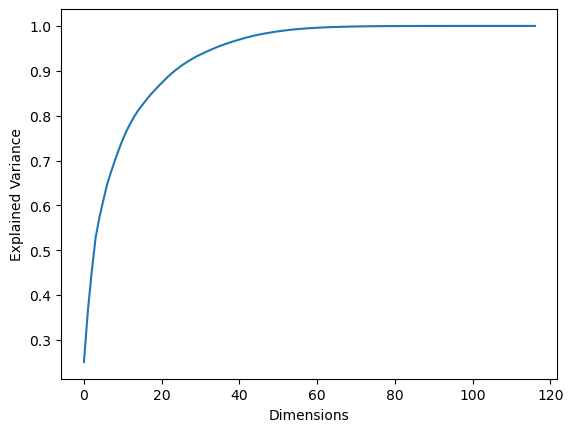

In [117]:
print("Shape x_PCA: ", X_pca.shape)
expl = pca.explained_variance_ratio_

for x in range(0, len(dt.columns), 2):
    print("Explained Variance: " + str(x) + " components:", sum(expl[0:x]))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.show()

Teníamos un total de 118 columnas, las cuales se han quedado en 117 porque no estamos trabajando con el nombre del jugador (lo quitamos cuando obtuvimos X e y).

Podemos ver que con 114 componentes tenemos un 1.0 de información, es decir, el 100%. Tiene sentido, ¿verdad? No estaríamos comprimiendo prácticamente nada. Y podemos ver cómo con 4 dimensiones tenemos muy poca información, con 24 ya tenemos algo más, y a partir de 40 tenemos casi toda. Esto es lógico, si analizamos las columnas que tenemos hay variables que se autocorrelacionan entre sí (por ejemplo, Net Rating es una resta entre el Of. Rating y Def. Rating). Entonces estamos viendo un problema de multicolinealidad, y eso lo queremos resolver aplicando PCA.</strong> Es por ello que vemos que hay diferentes variables, como las mencionadas, que de alguna manera son lo mismo, y por ello vemos cómo las dimensiones nos comprimen hasta casi el número de variables (features) que nuestra lógica nos dice que si son diferentes.

Una vez vemos la gráfica, podemos elegir 26 componentes, lo que esté por un 90% ya es interesante. Así que a continuación vamos a elegir 26 componentes y vamos a ver cómo se ha traducido este paso. Es decir, quiero ver cada fila como un jugador con sus 26 dimensiones. Cuyas dimensiones serán el resultado de haber aplicado PCA a los datos originales. (Aquí estamos utilizando <strong>y</strong>, es decir, el nombre de los jugadores).

In [118]:
N_COMP = 26
columns = []

for col in range(1, N_COMP+1, 1):
    columns.append("PCA" + str(col))

dt_pca_resultado = pd.DataFrame(data=X_pca[:,0:N_COMP], columns=columns, index = y)

dt_pca_resultado.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20,PCA21,PCA22,PCA23,PCA24,PCA25,PCA26
Justin Bean,0.067675,1.513376,1.472233,-0.928789,0.476378,-1.609958,-1.555789,-0.335263,0.460200,-1.267947,-1.875067,-0.234121,0.518823,0.757778,-0.740327,0.149655,1.553981,-0.275695,-0.410263,-0.853475,0.590689,-0.135076,-0.061897,-0.868316,-1.052817,1.570688
Sterling Brown,-2.833767,-0.257200,-3.644346,0.230570,0.249486,-0.565531,-3.166617,-1.063376,1.025968,0.615231,-1.785221,-1.710757,-1.323864,1.189366,-0.788516,0.102078,-0.770537,-0.099124,-0.316993,-0.914008,1.024764,-1.686440,0.683620,0.644820,0.534815,0.535064
Malte Delow,-0.536851,0.521855,-0.568375,1.908459,-1.313957,-0.635919,-2.452913,-1.707427,0.282309,0.142183,-2.432399,-0.762919,-0.087047,-0.161337,-0.323137,-0.289639,1.534539,0.227034,1.244924,-0.159962,2.519843,-0.628594,0.586165,0.859862,-0.468161,0.010257
Martin Hermannsson,-0.876675,0.752816,-3.987179,2.277420,-2.118482,-0.195073,-2.601902,-4.119029,1.489875,0.906748,-1.107240,-1.632526,0.734696,0.492709,-0.149805,0.687390,1.069050,1.550071,-0.335644,0.613319,-1.077010,0.185796,0.116724,0.229541,0.161520,1.131126
Christ Koumadje,-2.406386,0.516445,4.879711,-6.013227,-1.055018,-1.324828,-1.811761,-2.329535,0.581531,0.516870,-0.905890,-0.653918,-0.591419,-0.104133,-1.347876,-1.208093,0.660910,-0.188849,0.262483,-0.941677,1.091558,0.195432,0.109125,0.348709,0.047608,0.534045


Interesante ver cómo, si ordenamos por dimensión, podemos ver diferentes jugadores más parecidos entre sí sólo en esa dimensión. Es decir, si ordenamos por la primera componente tendríamos listados jugadores que más se parecen entre sí en base a esa componente.

In [119]:
dt_pca_resultado.sort_values(by=['PCA1'])

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20,PCA21,PCA22,PCA23,PCA24,PCA25,PCA26
Mike James,-9.566512,-5.829399,-6.568097,0.443137,-1.987403,1.630259,1.143404,2.021138,0.477845,0.218159,1.856672,1.016547,-0.467488,-0.150616,-1.055394,-0.955918,0.582181,-0.079846,-0.553922,-0.422666,-1.112152,1.482763,0.842196,0.340621,-0.263406,0.120606
Keenan Evans,-8.827629,-5.892421,-5.101688,1.499782,-1.042466,1.019811,-0.224698,1.047485,2.099176,0.564893,0.215923,0.679582,0.127814,-1.795509,-1.671817,-0.824941,0.268369,0.173246,-0.600618,-0.722421,-1.008635,1.651604,0.702783,0.656045,0.407939,-1.428200
Mathias Lessort,-8.651999,-5.072192,0.068663,-6.930653,-3.070597,-1.279647,1.918187,1.040773,0.843519,2.866154,2.591061,0.307826,0.160275,-2.124560,-1.848263,-0.564302,-0.150460,-0.874082,-0.571639,0.392874,0.109367,0.832676,1.071234,-0.105839,0.189912,0.978552
Wade Baldwin,-8.110727,-3.930403,-6.021679,0.643356,-2.150601,1.110605,0.414652,-0.049128,1.342406,2.045622,2.347491,-0.521107,0.507868,-1.003835,0.082398,0.215926,-0.754261,0.462016,-0.019249,0.707972,-1.351249,1.098478,-0.568458,-0.533359,-0.482927,-0.662598
Chima Moneke,-7.793271,-4.617920,-0.341106,-4.476630,-0.447405,-0.316114,-0.799941,1.353773,1.017281,1.727203,0.674779,0.276465,-0.561930,0.745849,-2.287644,0.503469,-0.099248,-1.544642,0.199144,0.483904,0.410421,0.783999,-0.898188,0.342284,-1.279781,-0.834909
Shane Larkin,-7.609048,-4.574318,-6.688335,1.192831,-0.078480,1.836739,1.810478,0.898371,1.183793,0.372086,0.240122,1.003176,0.481712,-0.749048,-1.094082,-0.462535,-0.487141,-0.302868,-0.181854,-1.559803,-1.081860,1.468330,1.067881,-0.436869,0.795852,-1.401742
Facundo Campazzo,-7.374370,-5.447162,-4.376182,2.798830,-2.592927,1.892742,3.493262,0.381458,-0.574996,0.041300,-0.021582,1.791933,0.744682,-0.933927,-1.067952,-0.518993,-0.193546,-1.350936,-0.465954,0.369924,-0.424541,1.760791,-0.442190,1.419167,-0.915641,-0.870032
Nikola Mirotic,-7.323110,-4.096713,-0.874791,-2.822158,1.433341,-0.032634,-2.281394,1.131373,1.955687,1.840123,0.991239,0.287004,-1.727087,0.197173,-1.488242,1.594609,-1.299626,-1.119403,2.623591,-0.073640,0.008091,1.274324,-2.011770,-0.456451,-0.355891,-0.406885
Tornike Shengelia,-7.265673,-3.311345,-3.214621,-2.828129,-2.553611,0.630421,-0.797225,-0.802208,1.328471,1.739744,1.132434,-0.803146,0.003019,0.273040,-0.164191,0.269934,-0.394179,-0.640234,0.220730,0.576876,-0.779778,-0.433944,1.270417,-0.346360,0.175473,-0.039377
Josh Nebo,-7.189245,-2.364973,3.302172,-6.981594,-0.593262,-1.979268,1.607604,-0.379993,0.600156,0.502453,1.325961,0.736229,-0.695045,0.327855,-0.656521,-1.317944,0.905632,-0.009800,-0.231717,0.044185,-0.622932,1.866565,0.685012,0.177240,-0.135670,0.374072


Pero buscamos los que mas se parecen en general, es decir, en todas las componentes obtenidas. <strong>No queremos trabajar sólo con una componente</strong>, ya que hemos conseguido comprimir todo el dataset y evitar el problema de la multicolinealidad, vamos a encontrar las correlaciones entre las dimensiones obtenidas. Y así podremos saber qué jugadores se parecen más entre sí en base a las dimensiones obtenidas por PCA.

In [120]:
corr_matrix = dt_pca_resultado.T.corr(method='pearson')

Podemos ver cómo la matriz de correlación es una matriz que me muestra cada jugador y un coeficiente de correlación con el resto. Aquí podemos ver como la diagonal es 1 porque, por ejemplo, en el primer caso, tenemos que Justin Bean se parece al 100% a Justin Bean, tiene sentido ¿verdad? En cambio ya vemos que con Sterling Brown hay otro factor de correlación, y con Malte Delow otro... <strong>Por lo tanto con esta matriz hemos conseguido encontrar los factores de correlación entre todos los jugadores usando unos parámetros (dimensiones) que nos ha ofrecido PCA.</strong>

In [121]:
corr_matrix.head()

,Justin Bean,Sterling Brown,Malte Delow,Martin Hermannsson,Christ Koumadje,Jonas Mattisseck,Kresimir Nikic,Louis Olinde,Gabriele Procida,Elias Rapieque,Linus Ruf,Ziga Samar,Tim Schneider,Matteo Spagnolo,Johannes Thiemann,Matt Thomas,Yanni Wetzell,Salih Altuntas,Rodrigue Beaubois,Elijah Bryant,Will Clyburn,Mike Daum,Erten Gazi,Justus Hollatz,Tyrique Jones,Shane Larkin,Ridvan Oncel,Ercan Osmani,Daniel Oturu,Tibor Pleiss,Darius Thompson,Emre Tunca,Melih Tunca,Derek Willis,Burak Yildizli,Erkan Yilmaz,Ante Zizic,Jaron Blossomgame,John Brown,Petr Cornelie,Alpha Diallo,Donta Hall,Mam Jaiteh,Mike James,Jordan Loyd,Donatas Motiejunas,Elie Okobo,Yakuba Ouattara,Matthew Strazel,Terry Tarpey,Kemba Walker,Chris Chiozza,Matthew Costello,Daniel Diez,Khalifa Diop,Seydina Faye,Markus Howard,Vit Hrabar,Maik Kotsar,Niccolo Mannion,Vanja Marinkovic,Codi Miller McIntyre,Chima Moneke,Joseba Querejeta,Sander Raieste,Nikolas Rogkavopoulos,Tadas Sedekerskis,Jordan Theodore,Joel Bolomboy,Dejan Davidovac,Yago Dos Santos,Rokas Giedraitis,Freddie Gillespie,Adam Hanga,Dalibor Ilic,Ognjen Kuzmic,Stefan Lazarevic,Branko Lazic,Luka Mitrovic,Shabazz Napier,Nemanja Nedovic,Marko Simonovic,Javonte Smart,Milos Teodosic,Trey Thompkins,Mike Tobey,Nikola Topic,Billy Baron,Giordano Bortolani,Guglielmo Caruso,Diego Flaccadori,Devon Hall,Kyle Hines,Ismael Kamagate,Maodo Lo,Rodney McGruder,Nicolo Melli,Samuele Miccoli,Nikola Mirotic,Shabazz Napier,Kevin Pangos,Alex Poythress,Giampaolo Ricci,Shavon Shields,Stefano Tonut,Johannes Voigtmann,Alex Abrines,Dario Brizuela,Oscar Da Silva,Willy Hernangomez,Kasparas Jakucionis,Rokas Jokubaitis,Nikola Kalinic,Nicolas Laprovittola,James Nnaji,Jabari Parker,Joel Parra,Oriol Pauli,Ricky Rubio,Dame Sarr,Tomas Satoransky,Jan Vesely,Leandro Bolmaro,Isaac Bonga,Devin Booker,Danko Brankovic,Carsen Edwards,Sylvain Francisco,Niels Giffey,Freddie Gillespie,Elias Harris,Serge Ibaka,Ivan Kharchenkov,Vladimir Lucic,Andreas Obst,Dino Radoncic,Nelson Weidemann,Nick Weiler Babb,Niklas Wimberg,Tarik Biberovic,Nick Calathes,Tyler Dorsey,Marko Guduric,Nigel Hayes Davis,Sehmus Hazer,Yam Madar,Melih Mahmutoglu,Hamza Mestoglu,Yigit Mestoglu,Johnathan Motley,Amine Noua,Georgios Papagiannis,Dyshawn Pierre,Sertac Sanli,Nathan Sestina,Scottie Wilbekin,Boris Dallo,Nando De Colo,John Egbunu,Youssoupha Fall,Edwin Jackson,Frank Jackson,Charles Kahudi,Joffrey Lauvergne,Paris Lee,David Lighty,Timothe Luwawu Cabarrot,Mbaye Ndiaye,Mike Scott,Deshaun Thomas,Noam Yaacov,Wade Baldwin,Tamir Blatt,Lorenzo Brown,Antonius Cleveland,Jake Cohen,Bonzie Colson,John Dibartolomeo,Omer Mayer,Rafael Menco,Rafi Menco,Josh Nebo,Jasiel Rivero,Roman Sorkin,Joe Thomasson,James Webb,Veniamin Abosi,Ignas Brazdeikis,Isaiah Canaan,Moustapha Fall,Giannoulis Larentzakis,Michalis Lountzis,Shaquielle McKissic,Nikola Milutinov,Nazareth Mitrou Long,Kostas Papanikolaou,George Papas,Alec Peters,Filip Petrusev,Anastasios Rozakeas,Luke Sikma,Georgios Tanoulis,Thomas Walkup,Nigel Williams Goss,Moses Wright,Kostas Antetokounmpo,Aleksander Balcerowski,Jerian Grant,Marius Grigonis,Kyle Guy,Juancho Hernangomez,Panagiotis Kalaitzakis,Mathias Lessort,Eleftherios Mantzoukas,Konstantinos Mitoglou,Dimitris Moraitis,Kendrick Nunn,Ioannis Papapetrou,Alexandros Samodurov,Kostas Sloukas,Luca Vildoza,Danilo Andjusic,Aleksa Avramovic,Bruno Caboclo,Perry Dozier,Savo Drezgic,Ognjen Jaramaz,Frank Kaminsky,Balsa Koprivica,Zach Leday,James Nunnally,Mateusz Ponitka,Kevin Punter,Alen Smailagic,Jaleen Smith,Uros Trifunovic,Tristan Vukcevic,Alberto Abalde,Carlos Alocen,Facundo Campazzo,Fabien Causeur,Gabriel Deck,Ismaila Diagne,Rudy Fernandez,Hugo Gonzalez,Mario Hezonja,Sergio Llull,Dzanan Musa,Eli Ndiaye,Vincent Poirier,Sergio Rodriguez,Walter Tavares,Guerschon Yabusele,Justin Anderson,Victor Claver,Brandon Davies,Sergio De Larrea,Guillem Ferrando Porro,Jared Harper,Martin Hermannsson,Damien Inglis,Chris Jones,Stefan Jovic,Xabi Lopez Arostegui,Lucas Mari,Semi Ojeleye,Kevin Pangos,Jaime Pradilla,Josep Puerto,Nathan Reuvers

Ahora es momento de echar un vistazo y poder ver qué jugadores se parecen mas al que elijamos (tiene que estar en el dataset, sino da problema).

Esta función admite el nombre del jugador del que se quieren buscar similares, la cantidad de similares que queremos obtener y la matriz de correlación ya obtenida. El resultado es una lista de jugadores con el factor de correlación ordenadas de mayor a menor.

In [122]:
def GetSimilarPlayers(PlayerName, numPlayers, corr_matrix):
    
    SimPlayers = pd.DataFrame(columns = ['PlayerName', 'Similar Player', 'Correlation Factor'])

    i = 0
    for i in range(0, numPlayers):
        row = corr_matrix.loc[corr_matrix.index == PlayerName].squeeze()

        SimPlayers.at[i, 'PlayerName'] = PlayerName
        SimPlayers.at[i, 'Similar Player'] = row.nlargest(i+2).sort_values(ascending=True).index[0]
        SimPlayers.at[i, 'Correlation Factor'] = row.nlargest(i+2).sort_values(ascending=True)[0]

        i = i+1
    
    return SimPlayers

Aquí podemos probar con diferentes jugadores. Es muy posible que haya jugadores que nosotros, que vemos la Euroleague, no consideremos que sean parecidos. Si vamos añadiendo nuevas variables, nuevas fuentes de datos y métricas correctamente definidas, este sistema devolvería similares más acertados.</strong>

In [123]:
PlayerName = 'Mike James'
NumPlayers = 5

df_correlatedPlayers = GetSimilarPlayers(PlayerName, NumPlayers, corr_matrix)

df_correlatedPlayers

,PlayerName,Similar Player,Correlation Factor
0,Mike James,Keenan Evans,0.943675
1,Mike James,Shane Larkin,0.938355
2,Mike James,Wade Baldwin,0.917832
3,Mike James,Elie Okobo,0.903382
4,Mike James,Facundo Campazzo,0.888


### Conclusión:
Creemos que el modelo de similitud es muy válido, puesto que se considera que los tres jugadores con mayor correlación son extremadamente parecidos en estilo de juego, posición e impacto en el juego, lo que refuerza la precisión de nuestro análisis.

Por ejemplo, Keenan Evans tiene un factor de correlación de 0.943675 con Mike James, lo que indica una altísima similitud. Shane Larkin y Wade Baldwin también muestran correlaciones elevadas de 0.938355 y 0.917832, respectivamente. Esto sugiere que estos jugadores comparten muchas características con Mike James, tanto en su forma de jugar como en su desempeño en la pista.

Un aspecto destacado de nuestro modelo es que, aunque no se le proporcionó información específica sobre la posición, edad o tamaño de los jugadores (se eliminó esa información para no sesgar al modelo), ha identificado a jugadores que coinciden con Mike James en todos los aspectos. Esto refuerza la precisión del modelo, ya que ha sido capaz de encontrar jugadores que no solo tienen un estilo de juego similar, sino que también comparten características físicas y posicionales importantes. Este resultado es muy positivo, ya que demuestra que el modelo puede identificar jugadores parecidos de manera integral, considerando múltiples factores relevantes de manera implícita.

Por último, la alta correlación entre estos jugadores y Mike James respalda la eficacia del modelo y su capacidad para identificar similitudes significativas entre los jugadores de la Turkish Airlines Euroleague a través de las estadísticas convencionales y avanzadas. 